# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [54]:
import pandas as pd

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [57]:
train.shape

(4234042, 4)

In [58]:
test.shape

(1411348, 3)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [59]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [60]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [61]:
train = train.fillna('')
test = test.fillna('')

In [62]:
train.isnull().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [63]:
test.isnull().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [64]:
train['title & description'] = train['title'] + ' ' + train['description']

In [65]:
train.head()

,title,description,Category_name,Category,title & description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [66]:
test['title & description'] = test['title'] + ' ' + test['description']

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [67]:
len(train['Category_name'].unique()) # Количество классов

50

In [68]:
from matplotlib import pyplot as plt

In [106]:
numbers = train['Category_name'].value_counts(normalize = True) * 100

In [70]:
lables = numbers.index

Text(0, 0.5, '% от общего числа объектов')

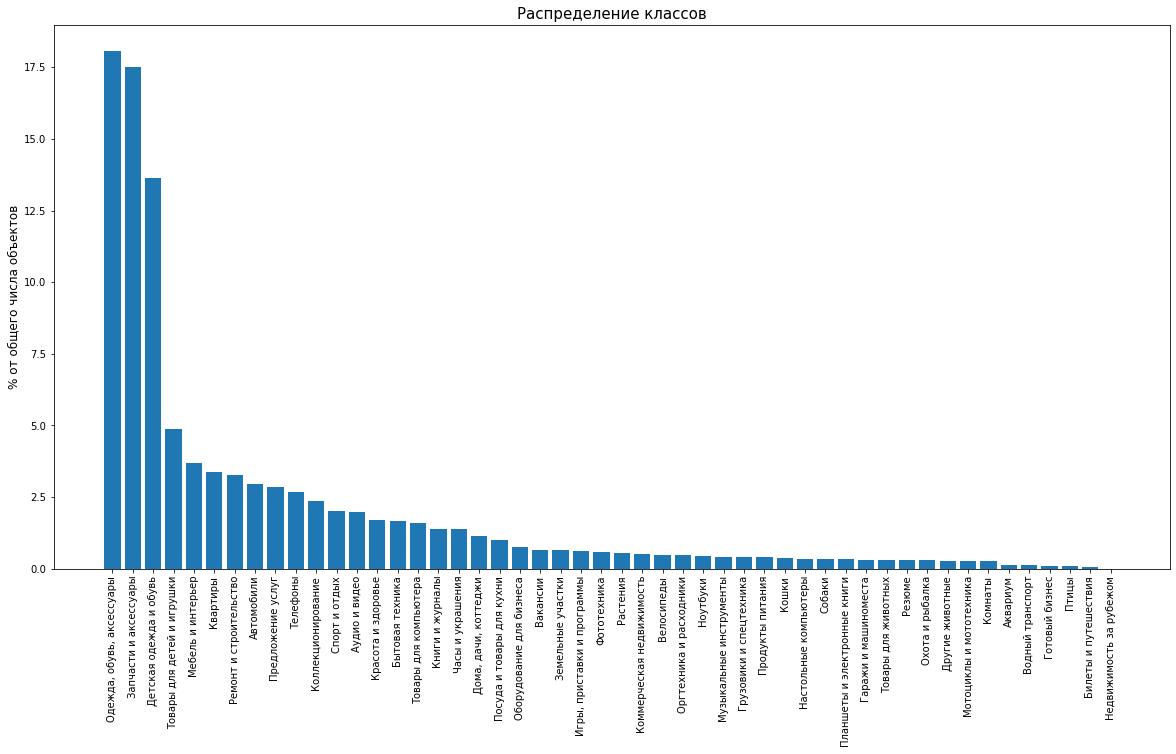

In [107]:
fig = plt.figure(figsize = (20,10))
plt.tick_params(axis = 'x', rotation = 90)
plt.bar(lables, numbers)
plt.title('Распределение классов', fontsize = 15)
plt.ylabel('% от общего числа объектов', fontsize = 12)

In [72]:
numbers

Одежда, обувь, аксессуары       0.180707
Запчасти и аксессуары           0.174939
Детская одежда и обувь          0.136394
Товары для детей и игрушки      0.048775
Мебель и интерьер               0.037018
Квартиры                        0.033593
Ремонт и строительство          0.032756
Автомобили                      0.029706
Предложение услуг               0.028378
Телефоны                        0.026850
Коллекционирование              0.023761
Спорт и отдых                   0.020163
Аудио и видео                   0.019681
Красота и здоровье              0.017110
Бытовая техника                 0.016754
Товары для компьютера           0.016079
Книги и журналы                 0.013948
Часы и украшения                0.013918
Дома, дачи, коттеджи            0.011392
Посуда и товары для кухни       0.010047
Оборудование для бизнеса        0.007590
Вакансии                        0.006403
Земельные участки               0.006381
Игры, приставки и программы     0.006217
Фототехника     

Наблюдается довольно высокий дисбаланс классов: наиболее наполненный класс "Одежда, обувь и аксессуары" содержит около 18% выборки, в то время как наименее наполненный класс "Недвижимость за рубежом" - всего 0,0039% выборки.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(train['title & description'])

In [75]:
x_train.shape # большая матрица

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [76]:
c = 0
for i in vectorizer.vocabulary_.keys():
    if i.startswith(('1', '2', '3', '4', '5', '6', '7', '8', '9')):
        c += 1
print(c)
# слова, начинающиеся с цифры

540784


In [77]:
from string import punctuation
c = 0
for i in vectorizer.vocabulary_.keys():
    if i.startswith(tuple(punctuation)):
        c += 1
print(c)
# слова, начинающиеся со знаков пунктуации

2043


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [78]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from string import punctuation
stemmer = SnowballStemmer('russian')

In [79]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiakobeleva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiakobeleva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
def MyTokenizer(sample):
    sample = [stemmer.stem(word) for word in word_tokenize(sample.lower()) if not word in stopwords.words('russian') and word.isalpha()]
    return sample

In [81]:
MyTokenizer(train['title & description'][0])

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [82]:
train_100 = train.sample(n = 100000)

In [83]:
from sklearn.model_selection import train_test_split
X = train_100['title & description']
y = train_100['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
vec = CountVectorizer(tokenizer = MyTokenizer)
X_train_CV = vec.fit_transform(X_train)

In [85]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train_CV, y_train)
preds_train = model.predict(X_train_CV)
preds_test = model.predict(vec.transform(X_test))

In [86]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(preds_train, y_train)
test_accuracy = accuracy_score(preds_test, y_test)
print('train accuracy: ', train_accuracy, ' \n', 'test accuracy: ', test_accuracy, sep = '')

train accuracy: 0.913775 
test accuracy: 0.82485


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer = MyTokenizer)
X_train_tfidf1 = tfidf_vec.fit_transform(X_train)

In [109]:
model.fit(X_train_tfidf1, y_train)
preds_train_tfidf1 = model.predict(X_train_tfidf1)
preds_test_tfidf1 = model.predict(tfidf_vec.transform(X_test))

In [110]:
train_accuracy = accuracy_score(preds_train_tfidf1, y_train)
test_accuracy = accuracy_score(preds_test_tfidf1, y_test)
print('train accuracy: ', train_accuracy, ' \n', 'test accuracy: ', test_accuracy, sep = '')

train accuracy: 0.8789125 
test accuracy: 0.8295


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_df = 0.9, tokenizer = MyTokenizer)
X_train_tfidf2 = tfidf_vec.fit_transform(X_train)

In [112]:
model.fit(X_train_tfidf, y_train)
preds_train_tfidf2 = model.predict(X_train_tfidf2)
preds_test_tfidf2 = model.predict(tfidf_vec.transform(X_test))

In [113]:
train_accuracy = accuracy_score(preds_train_tfidf2, y_train)
test_accuracy = accuracy_score(preds_test_tfidf2, y_test)
print('train accuracy: ', train_accuracy, ' \n', 'test accuracy: ', test_accuracy, sep = '')

train accuracy: 0.8792125 
test accuracy: 0.8295


In [114]:
X_train_tfidf1.shape # матрица поменьше

(80000, 74684)

In [115]:
X_train_tfidf2.shape

(80000, 74684)

In [91]:
X_train_CV.shape 

(80000, 74684)

При ограничении максимального df размер матрицы и accuracy не изменились. Размер матрицы по сравнению с CountVectorizer остался таким же, accuracy на тестовой выборке немного повысилось (около 0,5%)

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [92]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(n_features = 30000, tokenizer = MyTokenizer)
X_train_HV = hash_vec.fit_transform(X_train)

/Users/anastasiakobeleva/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [93]:
model.fit(X_train_HV, y_train)
preds_train_HV = model.predict(X_train_HV)
preds_test_HV = model.predict(hash_vec.transform(X_test))

In [94]:
train_accuracy = accuracy_score(preds_train_HV, y_train)
test_accuracy = accuracy_score(preds_test_HV, y_test)
print('train accuracy: ', train_accuracy, ' \n', 'test accuracy: ', test_accuracy, sep = '')

train accuracy: 0.8498125 
test accuracy: 0.8114


In [95]:
X_train_HV.shape # совсем маленькая матрица

(80000, 30000)

Самая высокая accuracy на тесте была показана после применения TF-IDF векторизации. 

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [98]:
model.fit(X_train_tfidf1, y_train)
final_preds = model.predict(tfidf_vec.transform(test['title & description']))

In [99]:
final = pd.DataFrame({'Id': test['itemid'], 'Category': final_preds})

In [102]:
final.to_csv(r'/Users/anastasiakobeleva/Desktop/final.csv', index = False)